# Introduction à la Science de Données
# TP2 -  Classification par les $k$ plus proches voisins


SMAIL AGHILAS


La documentation Scikit-learn sur les $k$ plus proches voisins se trouve ici: http://scikit-learn.org/stable/modules/neighbors.html


Avant de commencer, vérifiez les versions des paquets Python:

In [1]:
import sys
import numpy as np # importation du package numérique
import matplotlib
import sklearn

print('python: {} (version 3 obligatoire)'.format(sys.version))
print('numpy: {} (version conseillée mais pas obligatoire:)'.format(np.__version__))
print('matplotlib: {} (version conseillée mais pas obligatoire: 3.0.0 au moins)'.format(matplotlib.__version__))
print('scikit-learn: {} (version conseillée mais pas obligatoire: 0.19 au moins)'.format(sklearn.__version__))

python: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)] (version 3 obligatoire)
numpy: 1.21.5 (version conseillée mais pas obligatoire:)
matplotlib: 3.5.1 (version conseillée mais pas obligatoire: 3.0.0 au moins)
scikit-learn: 1.0.2 (version conseillée mais pas obligatoire: 0.19 au moins)


Une version récente de Matplotlib est particulièrement souhaitable pour que l'affichage des images se fasse correctement, sans "lissage".

## 1. Données *digits*
Dans la première partie de ce TP, nous allons utiliser des données déjà présentes dans scikit-learn, à l'image des données Iris du premier TP.

Ces données sont très connues en apprentissage, sous le noms de MNIST. Elles sont composées d'images de chiffres manuscrits à une résolution de 8*8. En scikit-learn, elles se nomment digits : 

In [2]:
from sklearn.datasets import load_digits

digitsData=load_digits() # jeu de données digits
X=digitsData.data # les exemples, un array numpy, chaque élément est aussi un array
y=digitsData.target # les classes

On peut regarder quelques informations :

In [3]:
print(X.dtype, X.shape)
print(y.dtype, y.shape)

float64 (1797, 64)
int32 (1797,)


Chaque donnée est donc une image de 8 pixels par 8 pixels, en niveau de gris (256 nuances possibles), stockée sous la forme d'un vecteur de dimension 64 comme une ligne de la matrice X (il y a 1797 images) et avec la valeur de la classe associée stockée dans un vecteur Y à part (comme pour Iris). Mais on peut quand même regarder l'image initiale :




Le vecteur de l'image d'indice 42 :  [ 0.  0.  0.  9. 10.  0.  0.  0.  0.  0.  7. 16.  7.  0.  0.  0.  0.  0.
 13. 13.  1.  0.  0.  0.  0.  0. 15.  7.  0.  0.  0.  0.  0.  4. 16. 15.
 12.  7.  0.  0.  0.  2. 16. 12.  4. 11. 10.  0.  0.  0.  8. 14.  5.  9.
 14.  0.  0.  0.  0.  6. 12. 14.  9.  0.]
[[ 0.  0.  0.  9. 10.  0.  0.  0.]
 [ 0.  0.  7. 16.  7.  0.  0.  0.]
 [ 0.  0. 13. 13.  1.  0.  0.  0.]
 [ 0.  0. 15.  7.  0.  0.  0.  0.]
 [ 0.  4. 16. 15. 12.  7.  0.  0.]
 [ 0.  2. 16. 12.  4. 11. 10.  0.]
 [ 0.  0.  8. 14.  5.  9. 14.  0.]
 [ 0.  0.  0.  6. 12. 14.  9.  0.]]


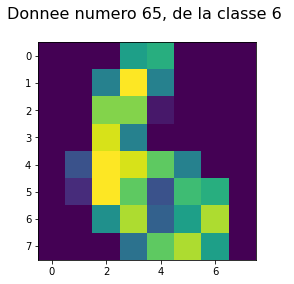

In [4]:
import matplotlib.pyplot as plt  # le package de visualisation
# la ligne spéciale pour que le notebook affiche comme il faut :
%matplotlib inline  
ix=65
donnee = X[ix,:] # on récupère une ligne, donc une donnée
classe = y[ix]   # et sa classe
print("Le vecteur de l'image d'indice 42 : ", donnee)

image = np.reshape(donnee,(8,8)) # on met les 8 morceaux de taille 8 du vecteur les uns en dessous des autres
print(image) # on affiche la matrice de pixels
plt.imshow(image) # on affiche l'image qui lui correspond
plt.title('Donnee numero %i, de la classe %i \n' % (ix, classe), fontsize = 16) # avec un titre
plt.show()

On peut faire des affichages plus intéressant, exemple sur les 5 premières données :

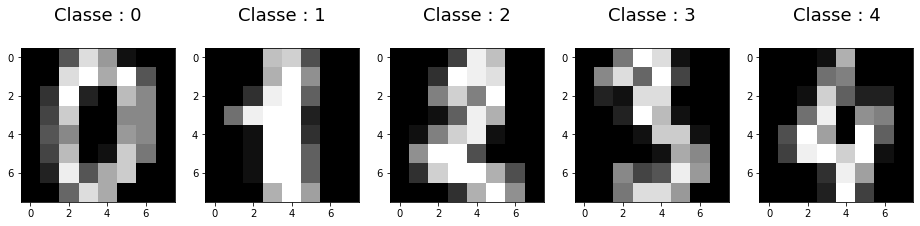

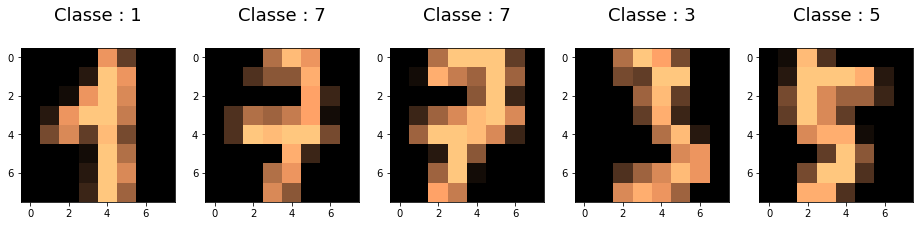

In [5]:
plt.figure(figsize=(16,4))
for index in range(5):
    image = X[index, :]
    classe = y[index]
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Classe : %i\n' % classe, fontsize = 18)
plt.show()
    
plt.figure(figsize=(16,4))
for index in range(5):
    image = X[42+index, :]
    classe = y[42+index]
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap="copper")
    plt.title('Classe : %i\n' % classe, fontsize = 18)  
plt.show()

## 2. Création, entraînement et évaluation d'un classifieur

Notre objectif est maintenant d'apprendre, sur la base d'un échantillon d'images "chiffres", un classifieur capable de prédire le chiffre qui correspond à une nouvelle image. Nous allons utiliser la méthode des $k$-plus proches voisins pour cet apprentissage. Elle est implémentée dans un package appelé neighbors. Examinons la série d'instructions suivante:

In [6]:
from sklearn import neighbors as nn # importation du package d'algorithmes travaillant sur les points voisins
help(nn.KNeighborsClassifier) # que fait cette instruction qui sera très utile par la suite?

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

Sympa, non ? Ce type d'instruction est utilisable pour toute classe de Python. 

Continuons l'exploration des $k$ plus proches voisins. Dans la série d'instructions suivante, on indique comment un classifieur peut être appris à partir de données étiquetées, et comment réaliser la prédiction sur un nouvel exemple.

Les fonctions *predict* et *fit* existent **pour tous les classifieurs** disponibles dans scikit-learn.

On note ici la syntaxe de la fonction predict: on lui passe en réalité un tableau d'exemples (ici, un tableau avec un seul exemple constitué de 64 attributs), et elle renvoit un tableau contenant la classe prédite pour chaque exemple du tableau en paramètre. Evidemment, dans les tableaux en entrée et en sortie, les indices des classes prédites correspondent aux indices des exemples en entrée ! 

Ainsi, lorsque l'on sait que l'on n'applique predict qu'à un seul exemple, une sélection finale [0] comme ci-après renvoit la première (et la seule) composante du tableau de résultat. 

In [7]:
nb_voisins = 15 # on fixe le nombre de voisins, à partir de 2 et au max le nombre d'exemples dans le jeu de données
clf = nn.KNeighborsClassifier(nb_voisins) 
# ci-dessus, création d'un classifieur: la variable clf est un "objet" classifieur, vide pour l'instant 
print(clf) # le classifieur est vide pour l'instant, il n'a pas été entraîné sur des données
clf.fit(X, y) # entraînement du classifieur clf sur les données étiquetées
nouvel_ex = X[50, :]  # On extrait la 50e image
print('prédiction pour le nouvel exemple: ',
      clf.predict(nouvel_ex.reshape(1,-1))) # prédiction du modèle appris sur la description d'une image aléatoire

KNeighborsClassifier(n_neighbors=15)
prédiction pour le nouvel exemple:  [2]


In [8]:
nb_voisins = 15 # on fixe le nombre de voisins, à partir de 2 et au max le nombre d'exemples dans le jeu de données
clf = nn.KNeighborsClassifier(nb_voisins) 
# ci-dessus, création d'un classifieur: la variable clf est un "objet" classifieur, vide pour l'instant 
print(clf) # le classifieur est vide pour l'instant, il n'a pas été entraîné sur des données
clf.fit(X, y) # entraînement du classifieur clf sur les données étiquetées
nouvel_ex = X[123, :]  # On extrait la 50e image
print('prédiction pour le nouvel exemple: ', clf.predict(nouvel_ex.reshape(1,-1))[0])

KNeighborsClassifier(n_neighbors=15)
prédiction pour le nouvel exemple:  8


Pour certains types de classifieurs, on peut même récupérer la probabilité que le classifieur attribue à l'appartenance de l'exemple à chaque classe possible. La fonction *predict_proba* fonctionne comme la fonction *predict*, sauf que le tableau en sortie contient, pour chaque exemple du tableau en entrée, un tableau de probabilité de la même taille que le nombre de classes.

In [9]:
autre_ex = X[123, :] # on génère un autre exemple en prenant une autre image
print(clf.predict_proba(nouvel_ex.reshape(1,-1))[0]) # probabilité d'appartenance à chaque classe pour ce chiffre
print(clf.predict_proba(autre_ex.reshape(1,-1))[0]) # idem pour un autre exemple

[0.         0.46666667 0.         0.         0.         0.
 0.         0.         0.53333333 0.        ]
[0.         0.46666667 0.         0.         0.         0.
 0.         0.         0.53333333 0.        ]


A votre avis, quelle classe sera attribuée au deuxième exemple, et pourquoi ? Indiquez ci-après l'instruction à exécuter pour vérifier. 

In [10]:
# a vous
print('prédiction pour l autre exemple: ', clf.predict(autre_ex.reshape(1,-1))[0])

prédiction pour l autre exemple:  8


Une première façon d'évaluer la qualité d'un classifieur est de le tester sur les exemples qui ont servi à l'apprendre. On utilise du coup la même fonction *predict*, appliquée au tableau des exemples d'apprentissage. 

In [11]:
f_X = clf.predict(X) # vecteur des classes prédites pour chaque exemple de l'ensemble d'apprentissage
print(X[f_X!=y]) # le tableau d'exemples pour lesquels la prédiction a été mauvaise

[[ 0.  0. 12. ... 10.  0.  0.]
 [ 0.  0.  6. ...  0.  0.  0.]
 [ 0.  0.  0. ... 16. 12.  0.]
 ...
 [ 0.  0.  7. ...  0.  0.  0.]
 [ 0.  1.  7. ...  6.  0.  0.]
 [ 0.  0.  5. ...  3.  0.  0.]]


Pour vous rendre compte de l'origine possible des erreurs de prédiction, faites une boucle sur toutes les images pour lesquelles la prédiction est erronnée en affichant à chaque fois l'image 8x8 avec dans le titre l'indice de l'image, la classe originale et la classe prédite (pour cela, on peut utiliser la fonction *numpy.argwhere* avec un peu de jugeotte).

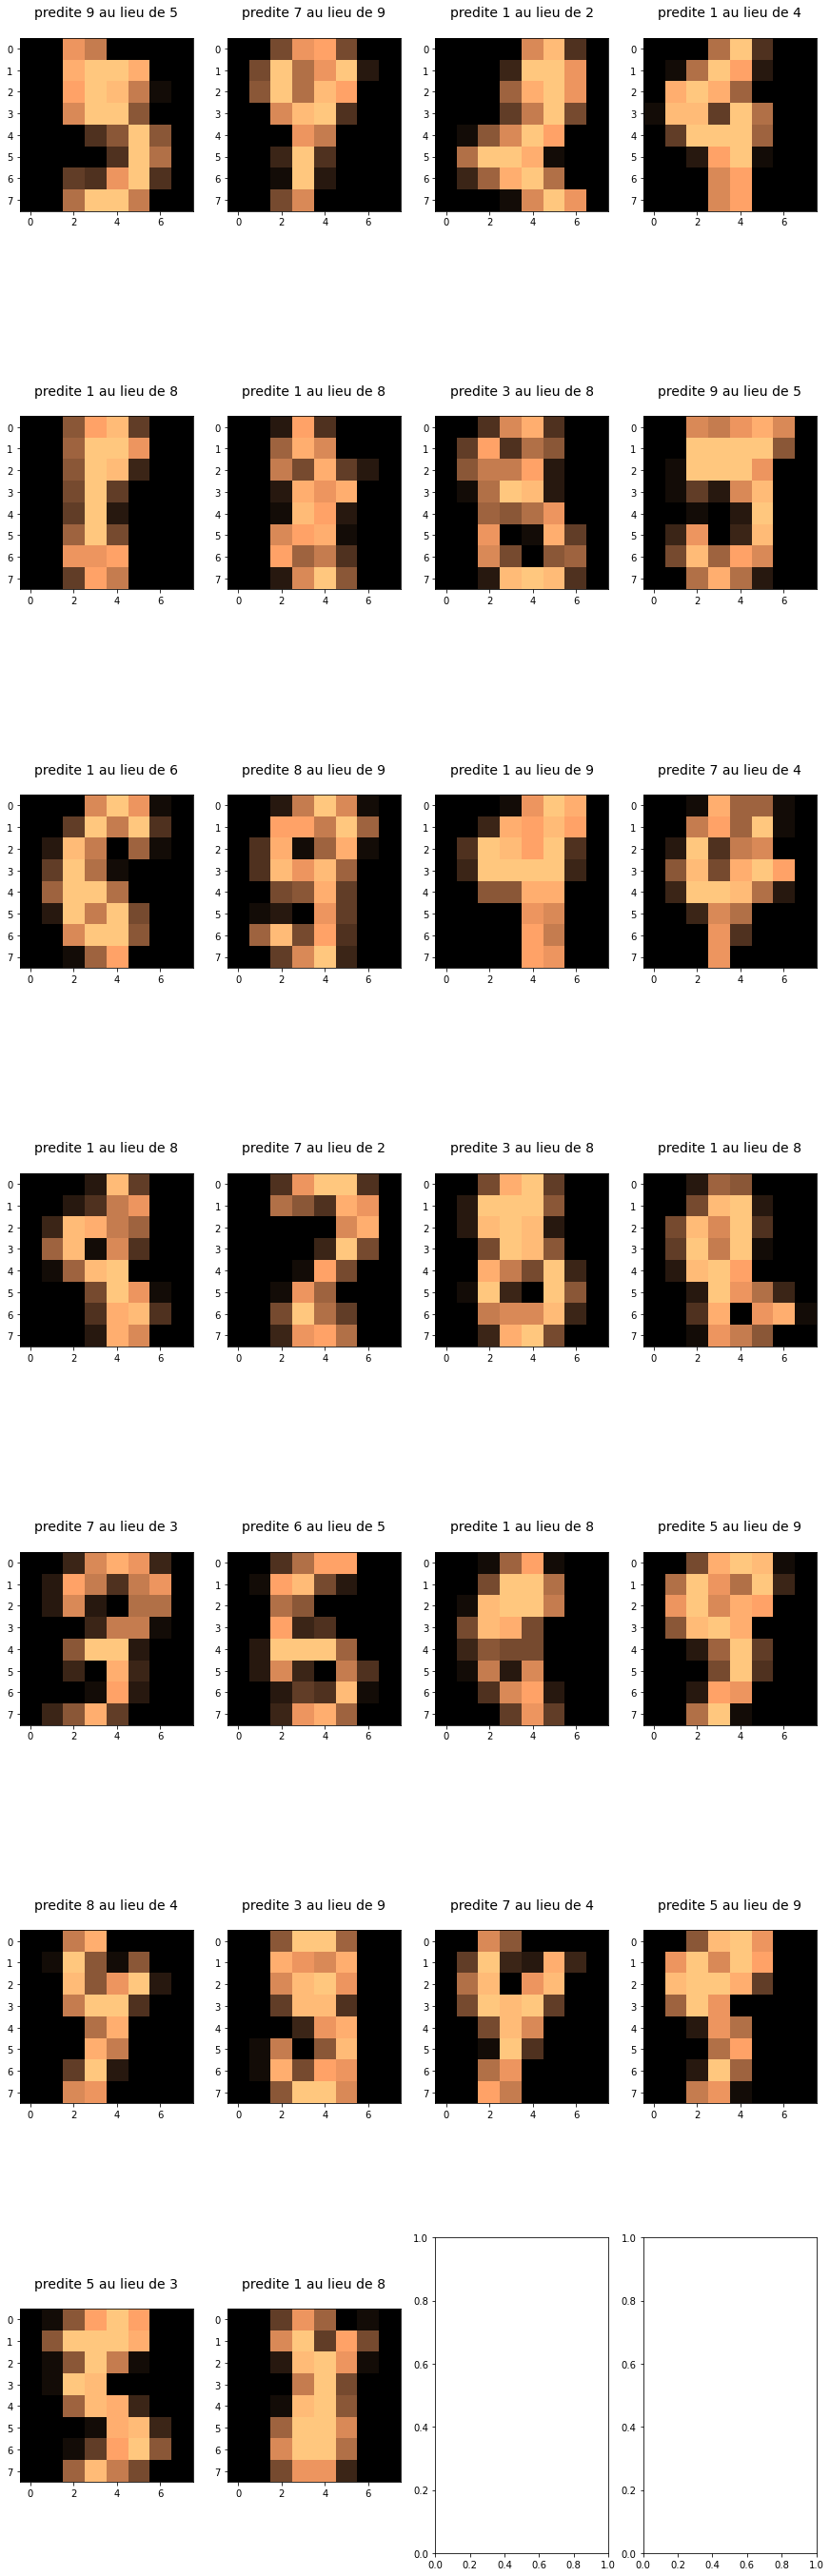

In [12]:
var = clf.predict(X)
iex = np.argwhere(y!=var)
nb_rows = int(iex.shape[0]/4)+1
fig, axes = plt.subplots(nb_rows,4, figsize=(15, 50))
i = 0
for index in iex:
    image = X[index, :]
    classe = y[index]
    predite = var[index]
    xax = i//4
    yax = i%4 
    axes[xax,yax].imshow(np.reshape(image, (8,8)), cmap="copper")
    axes[xax,yax].set_title('predite %i au lieu de %i\n' % (predite, classe), fontsize = 14)
    i = i+1
plt.show()

Chaque classifieur possède une fonction score, qui permet de comparer les prédictions d'un ensemble d'exemples $X$ pour lesquelles on connaît les étiquettes $y$ : la fonction calcule le taux de bonne classifications. 

In [13]:
print('taux de bonne classification', clf.score(X,y)) 
# taux de bonne classification du modèle sur l'ensemble d'apprentissage (car X et y sont les données d'apprentissage): fonction score

taux de bonne classification 0.9855314412910406


On la détourne facilement pour obtenir le taux d'erreur: faites le (vous devez obtenir 0.01446855...)!

In [14]:
# a vous
sc = clf.score(X,y)
erreur = 1 - sc # en fait une soustraction de 1 et le scors trouver en haut
print(erreur)


0.014468558708959356


## 3. Variation du nombre de voisins

L'algorithme des $k$-plus proches voisins fonctionne avec plusieurs hyper-paramètres (paramètres de l'agorithme, pas du modèle appris): la valeur de $k$ est un de ces paramètres. Réalisez un programme qui fait varier cet hyper-paramètres dans un intervalle comprenant des valeurs entre 1 et 35, et stocker l'évolution de l'erreur d'apprentissage (celle calculée sur l'échantillon d'apprentissage), puis en réaliser une courbe avec en abscisse les valeurs de k, et en ordonnées les erreurs.

On peut utiliser pour ce faire la fonction de construction d'un tableau *numpy.arange* (cf documentation), la fonction *len(X)* qui renvoit la taille d'un tableau à une dimension. Pour la courbe, on utilisera simplement *plot(abs, ord)* du package *pyplot* de *matplotlib*, comme vue au premier TP.

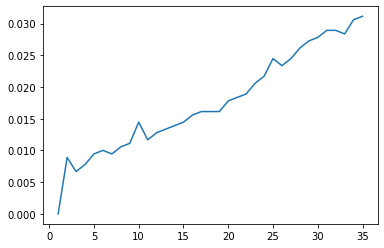

In [15]:
rangek = np.arange(1,36,dtype=int)
erreur_app = np.zeros(35)
for k in rangek:
    clf = nn.KNeighborsClassifier(k) 
    clf.fit(X,y)
    erreur_app[k-1] = 1-clf.score(X,y)

plt.plot(rangek, erreur_app)

Qu'observez-vous ? A quelle valeur de k atteint-on un meilleur classifieur ? Quelle est globalement, sur ce jeu de données, l'influence de $k$? Que se passe-t-il exactement pour $k=1$?

## 4. Evaluation de l'erreur réelle du classifieur appris 

### 4.1. Hold-out

Lorsque le score du classifieur appris est évalué sur l'ensemble d'apprentissage, il est en général sur-estimé (pourquoi ?) et donc, très peu fiable. La meilleure méthode pour évaluer un classifieur consiste à calculer son score sur un échantillon test, indépendant de l'échantillon d'apprentissage mais généré dans les mêmes
conditions. Lorsqu'on dispose d'un seul ensemble d'exemples (comme c'est le cas de *digits*), il faut donc:

* répartir les données en un sous-ensemble d'apprentissage et un sous-ensemble test,
* entrainer un classifieur sur l'ensemble d'apprentissage 
* évaluer ce classifieur sur l'ensemble test (on a ici une évaluation de l'erreur réelle, qui reste instable puisque dépend du découpage effectué)

Si les données sont peu nombreuses, comme c'est le cas pour le jeu de données *digits*, cette évaluation risque d'être pessimiste (avez-vous une idée de pourquoi ? Si oui, expliquez, sinon réfléchissez!).

Scikit-learn vient avec toute une panoplie d'outils pour évaluer cette erreur. Pour l'instant, nous n'utiliserons que la fonction qui permet de diviser un échantillon en deux parties (attributs et classes): c'est la fonction *train_test_split* du package *model_selection*, que nous appliquons ci-après sur Iris (nous ne printons que les trois premiers exemples de chaque sous-échantillon, avec leurs étiquettes):


In [16]:
from sklearn.model_selection import train_test_split
# production de deux sous-échantillon
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25, random_state=42) 
print(Xtrain[:3,:], ytrain[:3])
print(Xtest[:3,:], ytest[:3])

[[ 0.  0.  2. 15. 15. 16. 11.  0.  0.  0.  8. 16. 11.  3.  0.  0.  0.  0.
  13.  9.  0.  0.  0.  0.  0.  5. 16.  3.  9. 11.  3.  0.  0. 10. 15. 15.
  16. 16. 11.  0.  0.  6. 16. 10.  7. 16.  5.  0.  0.  0.  3.  4. 15.  8.
   0.  0.  0.  0.  4. 15.  7.  0.  0.  0.]
 [ 0.  5. 16. 15.  3.  0.  0.  0.  0. 11. 14. 11. 11.  0.  0.  0.  0.  8.
  11.  4. 16.  0.  0.  0.  0.  0.  0.  4. 13.  0.  0.  0.  0.  0.  0.  8.
  12.  0.  0.  0.  0.  0.  0. 13.  9.  5.  1.  0.  0.  1. 11. 16. 16. 16.
  10.  0.  0.  5. 16. 14.  8.  6.  1.  0.]
 [ 0.  0.  4. 13.  8.  0.  0.  0.  0.  0. 13. 16. 15.  7.  0.  0.  0.  3.
  16.  9.  6. 15.  6.  0.  0.  8. 14.  0.  0.  4.  8.  0.  0.  8. 12.  0.
   0.  4.  8.  0.  0.  4. 12.  0.  0. 11.  6.  0.  0.  0. 14. 10. 12. 14.
   1.  0.  0.  0.  7. 15. 11.  2.  0.  0.]] [5 2 0]
[[ 0.  0.  0.  7. 12.  0.  0.  0.  0.  0.  4. 16.  8.  0.  0.  0.  0.  0.
  12. 11.  0.  0.  0.  0.  0.  0. 15. 10.  8.  6.  1.  0.  0.  0. 15. 16.
   8. 10.  8.  0.  0.  0. 14.  7.  0.  0. 12.  0

Ici, nous produisons un découpage dans lequel l'ensemble d'apprentissage représente 75% de l'échantillon initial, et l'échantillon de test représente 25% des données initiales.

Il faut bien comprendre le rôle du paramètre random_state qui initialise le processus aléatoire: avec la même valeur dans deux appels de lafonction train_test_split, la séparation du jeu de données obtenue restera identique, car l'initialisation de la sélection aléatoire est la même. Pour illustrer cela, réaliser un second appel avec les mêmes paramètres et vérifier les premiers éléments des tableaux obtenus qui doivent être similaires à ceux ci-avant; puis réaliser un troisième appel avec une autre valeur pour random_state, et vérifier à nouveau les premiers éléments des tableaux pour constater qu'ils ont changé.

In [17]:
# Un essai de random_state qui est égale a 20.

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25, random_state=20) 
print(Xtrain[:3,:], ytrain[:3])
print(Xtest[:3,:], ytest[:3])


[[ 0.  0.  1. 10. 13. 12.  5.  0.  0.  0. 13. 13.  4.  4. 12.  0.  0.  3.
  16.  7.  4. 12.  6.  0.  0.  2. 15. 16. 15.  5.  0.  0.  0.  0.  1.  9.
  16.  0.  0.  0.  0.  0.  0.  2. 15.  0.  0.  0.  0.  0.  0. 11.  6.  0.
   0.  0.  0.  0.  0. 15.  0.  0.  0.  0.]
 [ 0.  0.  9. 15.  5.  0.  0.  0.  0.  0. 13. 14. 13.  7.  0.  0.  0.  0.
   6. 14. 10. 13.  1.  0.  0.  0.  0.  9. 12. 15.  5.  0.  0.  0.  0.  0.
   0. 10. 10.  0.  0.  0.  0.  0.  0.  7. 14.  0.  0.  0.  3.  8.  9. 15.
  15.  0.  0.  0.  5. 12. 12.  9.  1.  0.]
 [ 0.  0. 13. 16. 15.  4.  0.  0.  0.  0.  9.  8. 13. 16.  3.  0.  0.  0.
   0.  0. 13. 16.  7.  0.  0.  0.  0.  1. 16. 12.  0.  0.  0.  0.  0.  0.
  15. 10.  0.  0.  0.  0.  0.  0.  8. 15.  0.  0.  0.  0.  3.  6. 15. 16.
   7.  0.  0.  0. 15. 16. 16. 11.  1.  0.]] [9 9 3]
[[ 0.  0.  2. 12.  9.  0.  0.  0.  0.  0. 11. 15. 12.  5.  0.  0.  0.  0.
  15.  5.  0. 14.  0.  0.  0.  2. 15.  1.  0.  9.  7.  0.  0.  4. 10.  0.
   0.  7.  8.  0.  0.  0. 12.  0.  0.  8. 10.  0

En vous inspirant de ce mode de découpage, écrire une séquence d'instructions permettant de séparer *digits* en deux parties égales, d'apprendre un 3-plus proches voisins sur le premier sous-échantillon, et de le tester sur le second: vous obtenez une **estimation** de l'erreur réelle. Obtenez-vous la même erreur que celle d'apprentissage mesurée précédemment ?

In [18]:
# a vous
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.5, random_state=42) 
k = 3
clf = nn.KNeighborsClassifier(k) 
clf.fit(Xtrain, ytrain) 
erreur = 1 - clf.score(Xtest, ytest) 
print(erreur)


0.013348164627363768


Faites maintenant à nouveau varier $k$, et pour chaque valeur, indiquez l'erreur réelle estimée sur la base d'un train_test_split de 70%, 30% ; tracer la courbe. Observez-bien les différences de valeurs des erreurs d'apprentissage et réelle: pourquoi sont-elles différentes ? Que constatez-vous ?

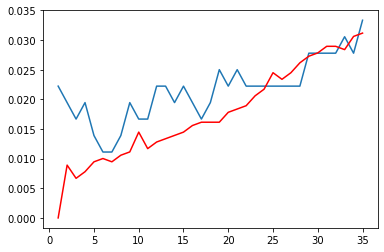

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=42) 
abs = np.arange(1,36,dtype=int)
ord = []
for k in abs:
    clf = nn.KNeighborsClassifier(k)
    clf.fit(Xtrain,ytrain)
    ord.append(1-clf.score(Xtest,ytest))
    
plt.plot(rangek, ord)
plt.plot(rangek, erreur_app, color="red")

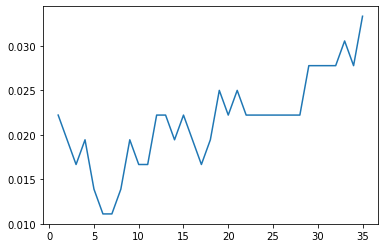

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=42) 

abs = np.arange(1, 36, dtype=int)
ord = []
for k in abs:
    clf = nn.KNeighborsClassifier(k)
    clf.fit(Xtrain, ytrain)
    ord.append(1-clf.score(Xtest,ytest))
plt.plot(abs, ord)


Le hold-out pratiqué ainsi mène à une estimation de l'erreur réelle qui dépend fortement de l'ensemble train et de l'ensemble test, qui ont été obtenus au hasard, où nous ne contrôlons que leur taille et le fait qu'un exemple ne peut être dans l'un et l'autre (quoiqu'il existe des variantes!). 

Afin d'éviter cette trop forte dépendance qui mène à une estimation très biaisée, l'usage est généralement de répéter cette séquence "split -- learn -- test -- estimate error " un certain nombre de fois, disons $T$ fois, en s'assurant que les ensembles produits au hasard à chaque fois sont différents d'une itération à l'autre. Une fois les $T$ séquences réalisées, une meilleure estimation est donnée par la moyenne des erreurs estimées à chaque séquence.


Programmez la répétition de $10$ séquences de hold-out pour estimer l'erreur réelle d'un kppv avec $k=3$ en moyennant les erreurs obtenues à chaque séquence (attention à garantir des splits différents à chaque séquence !).

In [21]:
som = 0;
for i in range(10):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.1, random_state=i*8+2) 
    #k = 3
    clf = nn.KNeighborsClassifier(3)
    clf.fit(Xtrain,ytrain)
    som += 1-clf.score(Xtest,ytest) # incrémentation de l'erreur
    #print("la somme est ", somme)
    print("La moyenne des erreurs estimée quand en 10 séquences de hold-out est : \n",som/(i+1));

La moyenne des erreurs estimée quand en 10 séquences de hold-out est : 
 0.02777777777777779
La moyenne des erreurs estimée quand en 10 séquences de hold-out est : 
 0.01944444444444443
La moyenne des erreurs estimée quand en 10 séquences de hold-out est : 
 0.0148148148148148
La moyenne des erreurs estimée quand en 10 séquences de hold-out est : 
 0.015277777777777779
La moyenne des erreurs estimée quand en 10 séquences de hold-out est : 
 0.014444444444444437
La moyenne des erreurs estimée quand en 10 séquences de hold-out est : 
 0.014814814814814817
La moyenne des erreurs estimée quand en 10 séquences de hold-out est : 
 0.01587301587301588
La moyenne des erreurs estimée quand en 10 séquences de hold-out est : 
 0.016666666666666677
La moyenne des erreurs estimée quand en 10 séquences de hold-out est : 
 0.01666666666666668
La moyenne des erreurs estimée quand en 10 séquences de hold-out est : 
 0.01611111111111112


### 4.2. Validation croisée

Une façon très classique et plutôt robuste d'estimer l'erreur réelle est de mettre en place une validation croisée : c'est une variante du hold-out répété, mais qui s'assure que chaque exemple a été pris au moins une fois pour apprendre, et au moins une fois pour tester.

Sous scikit learn, nous disposons de la fonction __cross_val_score__ du package __sklearn.model_selection__. Il suffit de lui passer le classifieur considéré, le tableau des données, celui des classes, et le nombre de folds à créer: voir la documentation https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html. Attention, cette fonction ne crée pas un modèle, mais n'est utilisée que pour estimer le score.

Ecrire un programme permettant d'estimer, par validation croisée $10$ folds, l'erreur d'un kppv avec $k=3$ sur les données digits. Obtenez-vous la même estimation de l'erreur réelle qu'avec le hold-out répété ?

In [22]:
from sklearn.model_selection import cross_val_score
erreurs = 1-cross_val_score(nn.KNeighborsClassifier(3),X,y,cv = 10)
print("estimation des erreurs est :" ,erreurs.mean())
print("\n")
print("estimation des erreurs pour chaque folds est : \n" ,erreurs)

estimation des erreurs est : 0.02336747361887028


estimation des erreurs pour chaque folds est : 
 [0.06111111 0.         0.01111111 0.02777778 0.03333333 0.02222222
 0.01666667 0.01675978 0.01675978 0.02793296]


Par défaut, cette fonction estime l'erreur réelle (ou le taux de bonne classification). Il est cependant possible d'estimer d'autres métriques, comme le rappel, la $F$-mesure, etc., grâce à son argument __scoring__ qui peut être affecté à une chaîne de caractères spécifiant la métrique désirée (parmi toutes celles implémentées dans sklearn, cf https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)

Estimez par validation croisée la F1-mesure de notre classifieur par validation croisée $5$ folds (attention, le problème de classification n'est pas binaire, ici).

In [23]:
F1_mesure = cross_val_score(nn.KNeighborsClassifier(3),X,y,cv = 5,scoring = 'f1_macro')
print("Estimation de l'erreur : ",F1_mesure.mean())
print("\n")
print("Le scoring pour les 5 folds est :\n " ,F1_mesure)

Estimation de l'erreur :  0.9665438778837953


Le scoring pour les 5 folds est :
  [0.95576632 0.95817631 0.96623133 0.98602146 0.96652397]


## 5. Variation autour de la métrique (optionnel mais instructif)

Au delà du nombre de voisins, un autre hyper-paramètre est la métrique utilisée pour calculer la distance entre les exemples. Par défaut, la distance de Minkowski est utilisée, avec le paramètre $p=2$ qui indique que nous considérons la distance euclidienne. Avec $p=1$, nous aurions la distance de manhattan, et de façon générale, avec p>0, la distance utilisée est $l_p$ :

$$l_p(x, x')=(\sum_{i=1}^n |x_i - x'_i|^p)^{\frac{1}{p}}$$

Ecrire un programme permettant de faire varier la distance utilisée pour évaluer son impact sur les performances, en faisant aussi varier $k$. Tracez les 3 courbes sur un même plot (cf. doc de *plot* pour voir comment faire), une pour chaque valeur de $p$ parmi ${1,2,5}$.

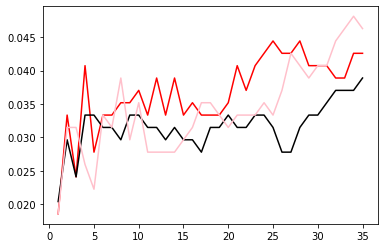

In [24]:
abs_ = np.arange(1, 36, 1, dtype=int)
ord_1 = []
ord_2 = []
ord_5 = []
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=35)
for k in abs:
    clf1 = nn.KNeighborsClassifier(k, p=1)
    clf1.fit(Xtrain, ytrain)
    ord_1.append(1-clf1.score(Xtest,ytest))

    clf2 = nn.KNeighborsClassifier(k, p=2)
    clf2.fit(Xtrain, ytrain)
    ord_2.append(1-clf2.score(Xtest,ytest))

    clf5 = nn.KNeighborsClassifier(k, p=5)
    clf5.fit(Xtrain, ytrain)
    ord_5.append(1-clf5.score(Xtest,ytest))
plt.plot(abs, ord_1, color='red')
plt.plot(abs, ord_2, color='black')
plt.plot(abs, ord_5, color='pink')

## 6. Matrice de confusion
Maintenant que vous avez sélectionné les meilleurs valeurs de $k$ et $p$, vous pouvez analyser plus finement les performances de votre meilleur classifieur. Pour cela, construisez la matrice de confusion, de taille $10 \times 10$, dans laquelle l'éléments $(i,j)$ correspond au nombre de fois qu'un exemple d'étiquette $i$ a été prédit avec une étiquette $j$. Quelles sont les confusions fréquentes?

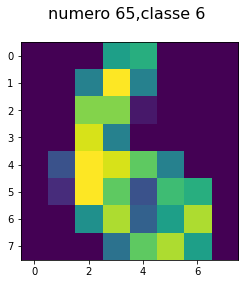

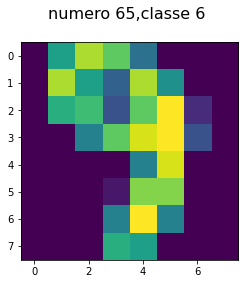

[[177, 2, 15, 12, 16, 1, 0, 9, 2, 11],
 [0, 116, 6, 9, 14, 2, 5, 47, 6, 0],
 [0, 1, 104, 18, 0, 0, 0, 4, 2, 1],
 [0, 13, 40, 1, 1, 60, 9, 1, 14, 0],
 [0, 19, 0, 0, 127, 0, 1, 19, 0, 19],
 [0, 8, 1, 18, 7, 105, 2, 7, 4, 33],
 [0, 10, 1, 26, 3, 3, 0, 12, 0, 90],
 [0, 12, 0, 0, 9, 0, 3, 4, 0, 0],
 [0, 1, 10, 99, 0, 2, 3, 76, 146, 26],
 [1, 0, 0, 0, 4, 9, 158, 0, 0, 0]]

In [25]:
X2 = X[::,::-1]
ix=65
donnee = X[ix,:] # on récupère une ligne
classe = y[ix]   # et sa classe
image = np.reshape(donnee,(8,8)) # on met les 8 morceaux de taille 8 du vecteur les uns en dessous des autres
plt.imshow(image) # on affiche l'image qui lui correspond
plt.title('numero %i,classe %i \n' % (ix, classe), fontsize = 16) # avec un titre
plt.show()

donnee = X2[ix,:] # on récupère une ligne, donc une donnée
classe = y[ix]   # et sa classe



image = np.reshape(donnee,(8,8)) # on met les 8 morceaux de taille 8 du vecteur les uns en dessous des autres
plt.imshow(image) # on affiche l'image qui lui correspond
plt.title('numero %i,classe %i \n' % (ix, classe), fontsize = 16) # avec un titre
plt.show()

matrice_de_confusion = []
for i in range(10):
    matrice_de_confusion.append([0] * 10)
clf = nn.KNeighborsClassifier(3, p=5)
clf.fit(X, y)
for i in range(len(X2)):
    donnee = X2[i,:] # on récupère une ligne, donc une donnée
    classe = y[i]   # et sa classe
    pred = clf.predict(donnee.reshape(1,-1))[0]
    matrice_de_confusion[pred][classe] = matrice_de_confusion[pred][classe] + 1;
matrice_de_confusion

**Optionnel.**

Une manipulation intéressante à faire consiste à retourner les images en leur faisant subir une rotation à 180º: de cette façon, les 6 ressemblent ensuite à des 9 et vice-versa, les 0 restent des 0, et les autres chiffres donnent parfois des caractères indéfinis. Faites des essais sur quelques exemples en les affichant pour trouver comment retourner une image, puis appliquez un k-NN ainsi: apprenez sur tout l'ensemble d'images originales, testez sur l'ensemble de toutes les images retournées, affichez la matrice de confusion pour voir dans quelle mesure les 6 sont reconnus comme des 9 et observez d'autres phénomènes.

In [26]:
# a vous